#### Видеокурс по теории вероятностей и математической статистике (20 ноября - 30 декабря)
Домашнее задание

*Урок 3

1. Случайная непрерывная величина A имеет равномерное распределение на
промежутке (200, 800].
Найдите ее среднее значение и дисперсию.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

A = 8
B = 2
samples = np.random.normal(A, B, size=10000)
print(samples)

[ 8.75857579  6.88753524  5.07380176 ...  6.50984282 10.02152577
  6.32094281]


In [2]:
#средняя и дисперсия
samples.mean(), samples.var(ddof=1)

(7.98441246670867, 4.106823311809051)

2. О случайной непрерывной равномерно распределенной величине B известно, что ее
дисперсия равна 0.2.
Можно ли найти правую границу величины B и ее среднее значение зная, что левая
граница равна 0.5?
Если да, найдите ее.

In [3]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

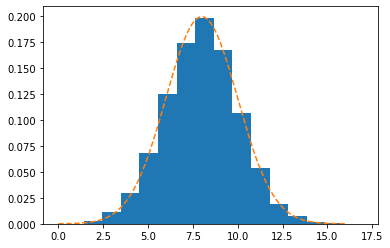

In [4]:
ox = np.linspace(0, 16, 1000)
oy = np.array([pdf_normal(A, B, x) for x in ox])
plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy, linestyle='dashed')

формулы:
Дисперсия:   D(X)=(B-A)^2/12
Матожидание: M(X) = (B+A)/2
A=    0.5
D(X)= 0.2
B = sqrt(12*D(X))+A

In [5]:
#B=
A = 0.5
D_X = 0.2
B = (12*D_X)**0.5 + A
B

2.049193338482967

In [6]:
#среднее значение будет соответствовать математическому ожиданию
M_X=(B+A)/2
M_X

1.2745966692414834

3. Непрерывная случайная величина X распределена нормально и задана плотностью
распределения
f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-(x+2)**2) / 32).
Найдите:
а). M(X)
б). D(X)
в). std(X) (среднее квадратичное отклонение)

по итогам изучения лекциии <a href='https://pnu.edu.ru/media/filer_public/5b/e6/5be6e8bd-ca3d-4560-9c5e-50bd1a519738/biderman_nsv.pdf'>ЛЕКЦИЯ 6 Непрерывные случайные величины
</a>

f_x = (1 / (4 * sqrt(2pi))) * (exp(-(x+2)*2) / 32)
из формулы: 
М(Х)= а = -2, 
D(X)=сигма**2=4**2=16
Среднеквадратическое отклонение = сигма = корень(16)=4

4. Рост взрослого населения города X имеет нормальное распределение.
Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.
Какова вероятность того, что случайным образом выбранный взрослый человек имеет
рост:
а). больше 182 см
б). больше 190 см
в). от 166 см до 190 см
г). от 166 см до 182 см
д). от 158 см до 190 см
е). не выше 150 см или не ниже 190 см
ё). не выше 150 см или не ниже 198 см
ж). ниже 166 см.

расчет произведен с использованием функции Лапласа
<a href='https://www.evkova.org/normalnyij-zakon-raspredeleniya'>ссылка на статью "Нормальный закон распределения - определение и вычисление с примерами решения"</a>

In [8]:
from scipy import stats 

def probability (small,big):
    Mn=174
    scale_=8
    return stats.norm.cdf(x=big, loc=Mn, scale=scale_) - stats.norm.cdf(x=small, loc=Mn, scale=scale_)

#а) больше 182 см: P(182 < X < +inf)
print(f'а)Вероятность, что рост больше 182 см: {probability (182,float("+inf"))}')

#б) больше 190 см: P(190 < X < +inf)
print(f'б)Вероятность, что рост больше 190 см: {probability (190,float("+inf"))}')

#в) от 166 см до 190 см: P(166 < X < 190)
print(f'в)Вероятность, что рост от 166 см до 190 см: {probability (166,190)}')

#г) от 166 см до 182 см: P(166 < X < 182)
print(f'г)Вероятность, что рост от 166 см до 182 см: {probability (166,182)}')

#д) от 158 см до 190 см: P(158 < X < 190)
print(f'д)Вероятность, что рост от 158 см до 190 см: {probability (158,190)}')

#е) не выше 150 см или не ниже 190 см см: P(-inf < X < 150) или P(190 < X < +inf)
print(f'e)Вероятность, что рост не выше 150 см или не ниже 190 см: {probability (float("-inf"),150) + probability (190, float("+inf"))}')

#ё) не выше 150 см или не ниже 198 см: P(-inf < X < 150) или P(198 < X < +inf)
print(f'ё)Вероятность, что рост не выше 150 см или не ниже 198 см: {probability (float("-inf"),150) + probability (198, float("+inf"))}')

#ж) меньше 166 см: P(-inf < X < 166)
print(f'ж)Вероятность, что рост меньше 166 см: {probability (float("-inf"),166)}')

а)Вероятность, что рост больше 182 см: 0.15865525393145707
б)Вероятность, что рост больше 190 см: 0.02275013194817921
в)Вероятность, что рост от 166 см до 190 см: 0.8185946141203637
г)Вероятность, что рост от 166 см до 182 см: 0.6826894921370859
д)Вероятность, что рост от 158 см до 190 см: 0.9544997361036416
e)Вероятность, что рост не выше 150 см или не ниже 190 см: 0.0241000299798093
ё)Вероятность, что рост не выше 150 см или не ниже 198 см: 0.0026997960632601965
ж)Вероятность, что рост меньше 166 см: 0.15865525393145707


5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека,
равный 190 см, от
математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25
кв.см?

среднеквадратичное отклонение(сигма) = Дисперсия**0,5 = 25**0,5=5 (корень из дисперсии)
стандартное оклонение: 178-5 / 178+5 = 173/183
правило 2 сигм: 178-5*2/178+5*2 = 168/188
правил 3 сигм: 178-15/178+15=163/193
т.о.рост человека в 190 см отклоняется на (190-178)/5 = 12/5 = 2,4 сигма